In [29]:
from qiskit import *
import numpy as np
from qiskit.primitives import *
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import RYGate

In this case we have to normalize the value

In [331]:
inputs = np.array([1,5,2,6,3,7,4,8])
Z = np.sqrt(inputs@inputs)
norm_inputs = inputs/Z
print('Normalizing factor : ', Z)
print('Normalized list :',np.round(norm_inputs,3))

Normalizing factor :  14.2828568570857
Normalized list : [0.07 0.35 0.14 0.42 0.21 0.49 0.28 0.56]




And we have to embed this value into each index of quantum state

When we consider two qubits embedding, there is 4 cases that is

00 - > 0
01 - > 1
10 - > 2
11 - > 3

and their value is v1,v2,v3,v4

so in this case, we have to make the state that is

v1|00> + v2|01> +v3|10> + v4|11>

and degree of freedom in v1,v2,v3,v4 is 3 because v1,v2,v3,v4 have to Satisfy the normalize condition.

And this makes us make a circuit that have 1 single qubit gate and 2 control qubit gates.

In [332]:
def value_to_angle(value_list):
    temp = np.array(value_list.copy())
    temp = temp/np.sqrt(temp@temp)
    temp = temp**2
    temp_dict = {}
    
    for index,i in enumerate(temp):
        temp_dict[format(index,'b').zfill(int(np.log2(len(value_list))))] = i
    theta_list = []
    
    def value_to_theta(dict):
        try:
            cos = 0
            sin = 0 
            for i in dict.keys():
                if i[-1] == '0':
                    cos+=dict[i]
                else:
                    sin+=dict[i]
            theta = np.arccos(np.sqrt(cos))*2
            temp_dict1 = {}
            temp_dict2 = {}
            theta_list.append(theta)
            
            for i in dict.keys():
                if i[-1] == '0':
                    temp_dict1[i[:(len(i)-1)]] = dict[i]/(cos+0.0000000001)
                else:
                    temp_dict2[i[:(len(i)-1)]] = dict[i]/(sin+0.0000000001)
            value_to_theta(temp_dict1)
            value_to_theta(temp_dict2)
        
        except:
            pass
    value_to_theta(temp_dict)
    
    return theta_list
            

In [333]:
angles = value_to_angle(inputs)

In [355]:
modify = [0,1,4,2,3,5,6]
result_angles = []

for i in modify:
    result_angles.append(angles[i])

In [356]:
def reverse(str_):
    res = ''
    for i in range(len(str_)):
        res = res + str_[-(i+1)]
    return res

In [357]:
reverse('01111')

'11110'

In [358]:
gate = []
paramets = ParameterVector('theta',len(inputs))
index = 0
qc = QuantumCircuit(3)
for i in range(3):
    for j in range(2**i):
        j = format(j,'b').zfill(i)
        j = reverse(j)
        control_num = i
        if control_num == 0:
            qc.ry(paramets[0],0)
            index += 1
        else:
            gate = RYGate(paramets[index]).control(control_num,ctrl_state=j)
            qc.append(gate,[m for m in range(i+1)]) 
            index += 1
qc.measure_all()   

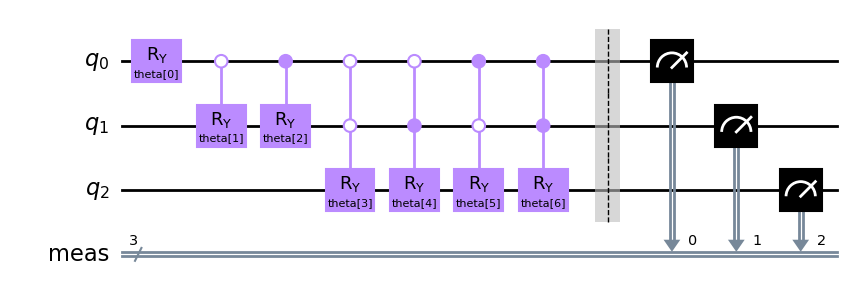

In [359]:
qc.draw('mpl')

In [360]:


sampler = Sampler()

result = sampler.run(qc,parameter_values=result_angles,shots = 100000).result().quasi_dists[0]

Reconst = []

for i in result.values():
    Reconst.append(np.sqrt(i)*Z)
    
    

In [361]:
print('Inputs : ', inputs)
print('Measure out put :',np.round(Reconst,3))

Inputs :  [1 5 2 6 3 7 4 8]
Measure out put : [0.973 5.    1.996 6.013 3.034 6.963 3.969 8.03 ]
